# Hyperparameter Tuning

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from wildfireassessment.grid import * 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, classification_report
import pickle
from sklearn.externals import joblib
from pathlib import Path
import scipy

C:\Users\ailin\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
filepathX = Path("./data/X.npy")
filepathy = Path("./data/y.npy")

X = np.load(filepathX)
y = np.load(filepathy)

In [4]:
# stratified shuffle 50/50 train/test split -- don't want too many since exhaustive grid search
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True, stratify=y)

In [5]:
print("train shape: ", X_train.shape)
print("test shape: ", X_test.shape)

print("\n# of burn labels in train: ", np.count_nonzero(y_train))
print("# of non-burn labels in train: ", y_train.shape[0]-np.count_nonzero(y_train))
print("# of burn labels in test: ", np.count_nonzero(y_test))
print("# of non-burn labels in test: ", y_test.shape[0]-np.count_nonzero(y_test))

train shape:  (7043, 44)
test shape:  (7043, 44)

# of burn labels in train:  4520
# of non-burn labels in train:  2523
# of burn labels in test:  4519
# of non-burn labels in test:  2524


## Random Forest Parameter Tuning

### Randomized Search

In [8]:
scores = ['accuracy', 'precision', 'recall', 'f1']

In [90]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [92]:
%pprint
random_grid

Pretty printing has been turned ON


{'n_estimators': [10,
  114,
  219,
  324,
  428,
  533,
  638,
  743,
  847,
  952,
  1057,
  1162,
  1266,
  1371,
  1476,
  1581,
  1685,
  1790,
  1895,
  2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10],
 'bootstrap': [True, False]}

In [88]:
gridSearch(RandomForestClassifier(), random_grid, scores, X_train, y_train, X_test, y_test, refit='precision', filename="rf_rand", cv=5, random=True, n_iter=25)

# Tuning hyper-parameters for precision

Random ON
Fitting model...
Best parameters set found on development set:

{'n_estimators': 743, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 82, 'bootstrap': False}

Grid scores on development set:

Scorer: accuracy

0.861 (+/-0.015) for {'n_estimators': 1057, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 46, 'bootstrap': True}
0.849 (+/-0.020) for {'n_estimators': 1057, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
0.866 (+/-0.015) for {'n_estimators': 533, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 28, 'bootstrap': False}
0.860 (+/-0.019) for {'n_estimators': 324, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 28, 'bootstrap': True}
0.864 (+/-0.011) for {'n_estimators': 1581, 'min_samples_split': 10, 'min_samples_leaf': 5, 'm

             precision    recall  f1-score   support

          0       0.85      0.77      0.81      2524
          1       0.88      0.93      0.90      4519

avg / total       0.87      0.87      0.87      7043


Saving best model to file: models\rf_rand_precision.pkl


## MLP Parameter Tuning

### Grid Search

In [95]:
# Hidden layer sizes
hidden_layers = [(50,50,50), (50,100,50), (100,)]
# Activation functions
activations = ['identity', 'logistic', 'tanh', 'relu']
# Solver
solvers = ['lbfgs', 'sgd', 'adam']
# Alpha
alphas = [0.0001, 0.05]
# Learning Rates
learning_rates = ['constant', 'adaptive', 'invscaling']

# Create the random grid
grid = {'hidden_layer_sizes': hidden_layers,
               'activation': activations,
               'solver': solvers,
               'alpha': alphas,
               'learning_rate': learning_rates}
grid

{'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
 'activation': ['identity', 'logistic', 'tanh', 'relu'],
 'solver': ['lbfgs', 'sgd', 'adam'],
 'alpha': [0.0001, 0.05],
 'learning_rate': ['constant', 'adaptive', 'invscaling']}

In [96]:
gridSearch(MLPClassifier(), grid, scores, X_train, y_train, X_test, y_test, refit='precision', filename="mlp_grid", cv=5)

# Tuning hyper-parameters for precision

Fitting model...
Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}

Grid scores on development set:

Scorer: accuracy

0.805 (+/-0.016) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.748 (+/-0.069) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.776 (+/-0.025) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.805 (+/-0.026) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.777 (+/-0.009) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive',

             precision    recall  f1-score   support

          0       0.75      0.80      0.77      2524
          1       0.88      0.85      0.87      4519

avg / total       0.83      0.83      0.83      7043


Saving best model to file: models\mlp_grid_precision.pkl


## KNN Parameter Tuning

In [112]:
# stratified shuffle 50/50 train/test split -- don't want too many since exhaustive grid search
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=y)

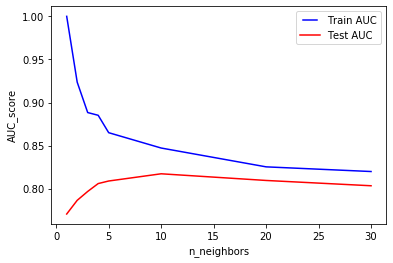

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline
neighbors = [1, 2, 3, 4, 5, 10, 20, 30]
train_results = []
test_results = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = knn.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results, 'b', label="Train AUC")
line2, = plt.plot(neighbors, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC_score')
plt.xlabel('n_neighbors')
plt.show()

In [9]:
# k neighbors
kneighbors = [int(x) for x in np.linspace(start = 5, stop = 15, num = 5)]
# Power
ps = [1, 2, 3, 4, 5]
# Weights
weights = ['uniform', 'distance']
# Algorithms
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
n_jobs = [3]

# Create the random grid
grid = {'n_neighbors': kneighbors,
               'p': ps,
               'weights': weights,
               'algorithm': algorithms,
               'n_jobs': n_jobs}
grid

{'n_neighbors': [5, 7, 10, 12, 15],
 'p': [1, 2, 3, 4, 5],
 'weights': ['uniform', 'distance'],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'n_jobs': [3]}

In [ ]:
gridSearch(KNeighborsClassifier(), grid, scores, X_train, y_train, X_test, y_test, refit='precision', filename="knn_grid", cv=5)

# Tuning hyper-parameters for precision

Fitting model...


## SVM Parameter Tuning

In [ ]:
# Kernel
kernels = ['linear', 'rbf', 'poly']
# Gamma
gammas = [0.1, 1, 10, 100]
# C Penalty param
cs = [0.1, 1, 10, 100, 1000]
# Degrees
degrees = [0, 1, 2, 3, 4, 5, 6]

# Create the random grid
grid = {'kernel': kernels,
               'gamma': gammas,
               'C': cs,
               'degree': degrees,
               'max_iter': [10000]}
grid

In [ ]:
gridSearch(svm.SVC(), grid, scores, X_train, y_train, X_test, y_test, refit='precision', filename="svm_grid", cv=5)